2022-02-24 09:36:37,530 - qm - INFO - Performing health check
2022-02-24 09:36:37,534 - qm - INFO - Health check passed
2022-02-24 09:36:37,566 - qm - INFO - Flags: 
2022-02-24 09:36:37,577 - qm - INFO - Simulating program


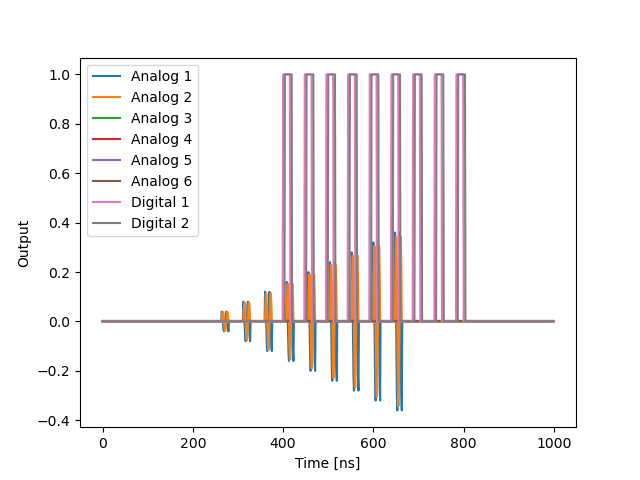

In [5]:
%matplotlib widget
from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.qua import *
from qm.simulate import SimulationConfig
from configuration import config
import time
import numpy as np
import matplotlib.pyplot as plt

local_ip = '192.168.50.97'
qmm = QuantumMachinesManager(host=local_ip, port='80')

with program() as sim_test:
    a = declare(fixed)
    with for_(a, 0.1, a < 1, a + 0.1):
        reset_phase('e_spin')
        play('const' * amp(a), 'e_spin')
        # wait(200, 'e_spin')
        # align()

# qm = qmm.open_qm(config)
# job = qm.execute(sim_test)
job = qmm.simulate(config, sim_test, SimulationConfig(
    duration=250,
    include_analog_waveforms=True
))

# get DAC and digital samples
samples = job.get_simulated_samples()

# plot all ports:
samples.con1.plot()

# another way, plot analog output 1 and digital output 9:
# plt.figure()
# plt.plot(samples.con1.analog["1"])
# plt.plot(samples.con1.digital["9"])
# plt.legend(("analog 1", "digital 9"))
# plt.xlabel("Time [ns]")
# plt.ylabel("Signal [V]")